# DNN


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split 

In [ ]:
set_random_seed(42)

## [1] 데이터 불러오기

In [ ]:
(X_train_base, y_train_base), (X_test_base, y_test) = load_data()

In [ ]:
def scaled_reshape(data):
    data_scaled = data/255.0
    data_reshape = data_scaled.reshape(-1, data_scaled.shape[1] * data_scaled.shape[2])
    return data_reshape

In [ ]:
X_train_base = scaled_reshape(X_train_base)
X_test = scaled_reshape(X_test_base)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_base, y_train_base
)

## [2] 데이터셋에 노이즈 추가

In [ ]:
# np.random.normal : 평균= 0, 표준편차= 1, 출력= size
X_train_noised = X_train + np.random.normal(0, 0.5, size=X_train.shape)
X_test_noised = X_test + np.random.normal(0, 0.5, size=X_test.shape)

# 픽셀범위 0.0 ~ 1.0 벗어나는 픽셀값 조절 np.clip(array, min, max)
X_train_noised = np.clip(X_train_noised, a_min=0, a_max=1)
X_testnoised = np.clip(X_test_noised, a_min=0, a_max=1)

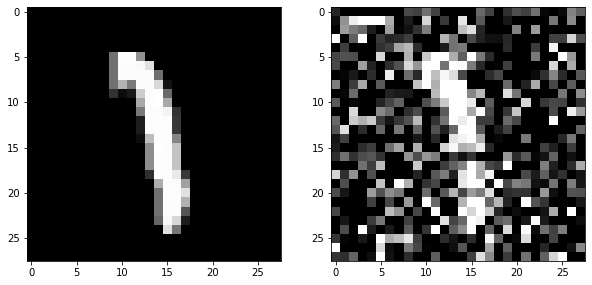

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.imshow(X_train[12].reshape(28, 28), cmap="gray")

plt.subplot(1,2,2)
plt.imshow(X_train_noised[12].reshape(28, 28), cmap="gray")
plt.show()

## [3] 모델 구성 및 생성

In [ ]:
def make_dnn_model(n_node:int):
    model = Sequential()
    # 입력
    model.add(Dense(units=n_node, activation="relu", input_shape=(28*28,)))
    # 출력
    model.add(Dense(784, activation="sigmoid"))
    model.compile(
        loss="mse",
        optimizer="adam"
    )
    return model

In [ ]:
model_dnn = make_dnn_model(1000)

model_dnn.fit(X_train_noised, X_train, verbose=False, epochs=1)

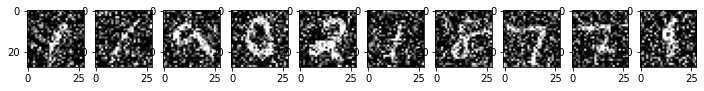

In [ ]:
plt.figure(figsize=(12, 7))

for i in range(1,11):
    origin, pred = img(X_train_noised, i)
    plt.subplot(1, 10, i)
    plt.imshow(origin, cmap="gray")

plt.show()

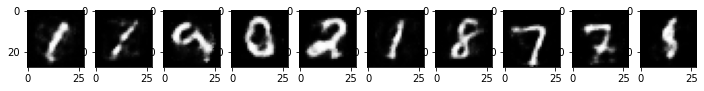

In [ ]:
plt.figure(figsize=(12, 7))

for i in range(1,11):
    origin, pred = img(X_train_noised, i)
    plt.subplot(1, 10, i)
    plt.imshow(pred, cmap="gray")

plt.show()